Mean Absolute Error: 318992.77938668214
R² Score: 0.0013474637940061873
Predicted Price for New Property: 864158.4810951368


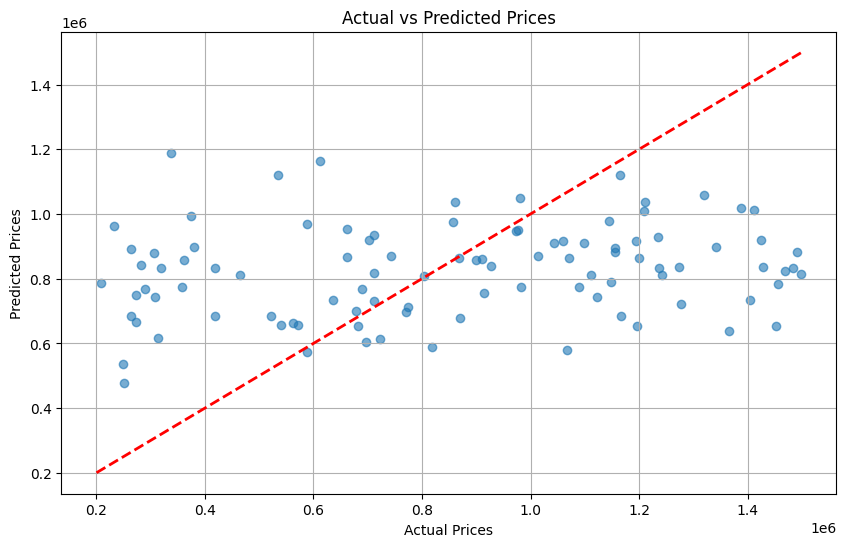

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
file_path = r"C:\Users\ASUS\PycharmProjects\P1\P1\melbourne_real_estate.csv"
data = pd.read_csv(file_path)

# Data preprocessing
# Filter for 2-bedroom units
two_bedroom_data = data[data['bedrooms'] == 2]

# One-Hot Encoding for categorical variables
two_bedroom_data = pd.get_dummies(two_bedroom_data, columns=['location'], drop_first=True)

# Feature selection (adjust these columns based on your dataset)
X = two_bedroom_data[['bathrooms', 'size', 'year_built'] + [col for col in two_bedroom_data.columns if 'location_' in col]]
y = two_bedroom_data['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Example prediction for a new 2-bedroom property (without location)
# Adjust this example to have the right number of features as per the trained model
new_property = pd.DataFrame([[1, 80, 2010]], columns=['bathrooms', 'size', 'year_built'])

# Create a DataFrame that matches the encoded training set
# This should include the one-hot encoded location columns
new_property_encoded = pd.DataFrame(columns=X.columns)

# Add the new property data while setting the rest to 0 for location features
new_property_encoded.loc[0] = [1, 80, 2010] + [0] * (len(new_property_encoded.columns) - 3)

predicted_price = model.predict(new_property_encoded)
print(f"Predicted Price for New Property: {predicted_price[0]}")

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Identity line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

